# 1.import Libraries

In [3]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D,
    LSTM, Bidirectional, Dense, Dropout
)
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    confusion_matrix, classification_report
)


In [ ]:
data_goss_fake=pd.read_csv("/content/gossipcop_fake.csv")
data_goss_real=pd.read_csv("/content/gossipcop_real.csv")
data_pol_fake=pd.read_csv("/content/politifact_fake.csv")
data_pol_real=pd.read_csv("/content/politifact_real.csv")
data_fake=pd.read_csv("/content/Fake.csv")


In [ ]:
data_pol_real

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...
...,...,...,...,...
619,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN
620,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...
621,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN
622,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874


In [ ]:
data_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
data_goss_fake['label']=0
data_pol_fake['label']=0
data_goss_real['label']=1
data_pol_real['label']=1


In [ ]:
data_pol_fake

,id,news_url,title,tweet_ids,label
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,0
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,0
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,0
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,0
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,0
...,...,...,...,...,...
427,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...,0
428,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...,0
429,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...,0
430,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...,0


In [ ]:
news=pd.concat([data_goss_fake,data_goss_real,data_pol_fake,data_pol_real],axis=0,ignore_index=True)

In [ ]:
news

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,0
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,0
...,...,...,...,...,...
23191,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN,1
23192,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...,1
23193,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN,1
23194,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874,1


In [ ]:
news.columns

Index(['id', 'news_url', 'title', 'tweet_ids', 'label'], dtype='object')

In [ ]:
news.drop(columns=['id', 'news_url','tweet_ids'],axis=1,inplace=True)

In [ ]:
news= news.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
news

,title,label
0,"The worst hit song of every year since 2000, f...",0
1,Let Hilary Duff's Swimsuit Style Inspire Your ...,1
2,Kristin Cavallari Grieves Brother Mikey on 3-Y...,1
3,Nikki and Brie Bella Debut WWE Superstar Barbi...,1
4,Emily Ratajkowski: Women should 'celebrate' se...,1
...,...,...
23191,On Air with Ryan Seacrest,0
23192,Miranda Lambert Makes History at the 2018 ACM ...,1
23193,Jimmy Kimmel can't get over last year's Best P...,1
23194,American Idol renewed: Katy Perry & Co. all se...,1


In [ ]:
news.groupby('label').size()

,0
label,
0,5755
1,17441


In [ ]:
news.duplicated().sum()

np.int64(1349)

In [ ]:
data_fake['label']=0

In [ ]:
data_fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
data_fake.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [ ]:
data_fake.drop(columns=[ 'subject', 'date'],axis=1,inplace=True)

In [ ]:
data_fake

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [ ]:
data_fake["content"] = data_fake["text"].fillna(data_fake["title"])


In [ ]:
data_fake

,title,text,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,Pope Francis used his annual Christmas Day mes...
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,21st Century Wire says As 21WIRE reported earl...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,21st Century Wire says It s a familiar theme. ...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,Patrick Henningsen 21st Century WireRemember ...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,21st Century Wire says Al Jazeera America will...


In [ ]:
data_fake.columns

Index(['title', 'text', 'label', 'content'], dtype='object')

In [ ]:
data_fake.drop(columns=['title', 'text'],axis=1,inplace=True)

In [ ]:
news.rename(columns={"title":"content"},inplace=True)

In [ ]:
news

,content,label
0,"The worst hit song of every year since 2000, f...",0
1,Let Hilary Duff's Swimsuit Style Inspire Your ...,1
2,Kristin Cavallari Grieves Brother Mikey on 3-Y...,1
3,Nikki and Brie Bella Debut WWE Superstar Barbi...,1
4,Emily Ratajkowski: Women should 'celebrate' se...,1
...,...,...
23191,On Air with Ryan Seacrest,0
23192,Miranda Lambert Makes History at the 2018 ACM ...,1
23193,Jimmy Kimmel can't get over last year's Best P...,1
23194,American Idol renewed: Katy Perry & Co. all se...,1


In [ ]:
news=pd.concat([data_fake,news],axis=0,ignore_index=True)

In [ ]:
news

,label,content
0,0,Donald Trump just couldn t wish all Americans ...
1,0,House Intelligence Committee Chairman Devin Nu...
2,0,"On Friday, it was revealed that former Milwauk..."
3,0,"On Christmas day, Donald Trump announced that ..."
4,0,Pope Francis used his annual Christmas Day mes...
...,...,...
46672,0,On Air with Ryan Seacrest
46673,1,Miranda Lambert Makes History at the 2018 ACM ...
46674,1,Jimmy Kimmel can't get over last year's Best P...
46675,1,American Idol renewed: Katy Perry & Co. all se...


In [ ]:
news.groupby('label').size()

,0
label,
0,29236
1,17441


In [ ]:
news.isna().sum()

,0
label,0
content,0


In [ ]:
news.duplicated().sum()

np.int64(7375)

In [ ]:
news=news.drop_duplicates()

In [ ]:
news.duplicated().sum()

np.int64(0)

In [ ]:
news.shape

(39302, 2)

In [ ]:
data=pd.read_csv("/content/WELFake_Dataset.csv")

In [ ]:
news.to_csv("final_news_dataset.csv", index=False)


# 2.Load Dataset

In [5]:
data1=pd.read_csv("/content/WELFake_Dataset.csv")
data2=pd.read_csv("/content/final_news_dataset.csv")
#Label (0 = fake and 1 = real).

In [7]:
data1

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [8]:
data2

,label,content
0,0,Donald Trump just couldn t wish all Americans ...
1,0,House Intelligence Committee Chairman Devin Nu...
2,0,"On Friday, it was revealed that former Milwauk..."
3,0,"On Christmas day, Donald Trump announced that ..."
4,0,Pope Francis used his annual Christmas Day mes...
...,...,...
39297,1,Frankie Muniz and Jordan Fisher on Returning t...
39298,0,Surrogate Mother Compensation
39299,1,Miranda Lambert Makes History at the 2018 ACM ...
39300,1,Jimmy Kimmel can't get over last year's Best P...


In [11]:
data2.tail()

,label,content
39297,1,Frankie Muniz and Jordan Fisher on Returning t...
39298,0,Surrogate Mother Compensation
39299,1,Miranda Lambert Makes History at the 2018 ACM ...
39300,1,Jimmy Kimmel can't get over last year's Best P...
39301,1,Famous People Who Died In 2017


# 3.Understand the Data (EDA)

In [13]:
data1.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [14]:
data1.shape

(72134, 4)

In [15]:
data1.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [16]:
data1.isna().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [17]:
data1[data1['title'].isna()]

,Unnamed: 0,title,text,label
1,1,NaN,Did they post their votes for Hillary already?,1
43,43,NaN,True. Hillary needs a distraction and what bet...,1
162,162,NaN,All eyes on Electoral delegates. The People kn...,1
185,185,NaN,Cool,1
269,269,NaN,A leading US senator: US Supporting War in Syr...,1
...,...,...,...,...
71484,71484,NaN,Another Arab supremacist masturbation fantasy....,1
71521,71521,NaN,I'm sure they drastically changed accounting m...,1
71540,71540,NaN,It's easy to imagine Obama or Kerry pissing hi...,1
71570,71570,NaN,Ever since the powers to be assassinated JFK A...,1


In [18]:
data1.duplicated().sum()

np.int64(0)

In [19]:
data1.count()

,0
Unnamed: 0,72134
title,71576
text,72095
label,72134


In [21]:
data1.value_counts('label')

,count
label,
1,37106
0,35028


In [23]:
data1.groupby('label').size()


,0
label,
0,35028
1,37106


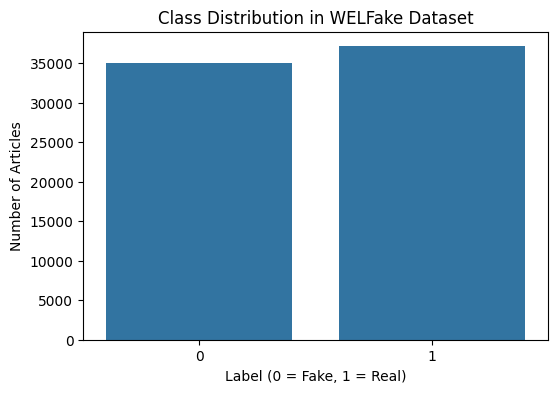

In [24]:
#Class Distribution (Fake vs Real)
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data1)
plt.title("Class Distribution in WELFake Dataset")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Number of Articles")
plt.show()


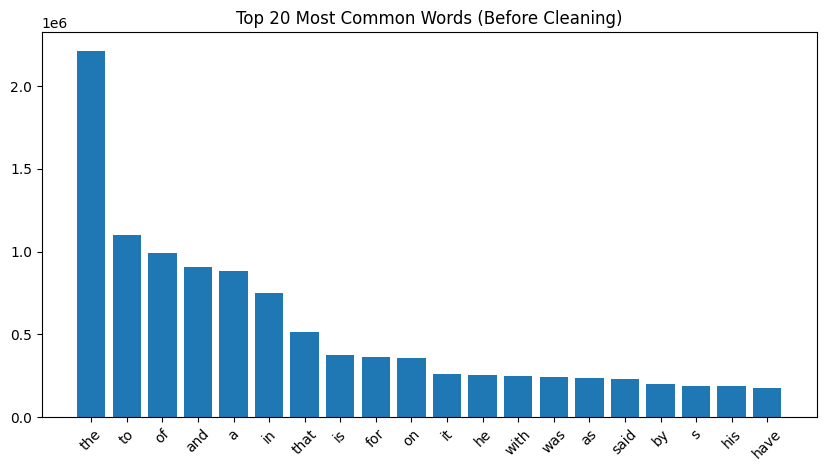

In [25]:
# Combine all text
all_text = " ".join(data1['text'].astype(str))

# Clean text lightly
all_text = re.sub(r"[^a-zA-Z ]", "", all_text).lower()

# Word frequency
words = all_text.split()
word_freq = Counter(words)

common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 20 Most Common Words (Before Cleaning)")
plt.xticks(rotation=45)
plt.show()


# 4.Data Cleaning

In [ ]:
#data.dropna(inplace=True) use another fill with empty string " "

In [27]:
#Combine title + text
data1['content'] = data1['title'].fillna('') + " " + data1['text'].fillna('')


In [28]:
data1.dropna(inplace=True)


In [30]:
data1=data1.drop(columns=['title','text','Unnamed: 0'])

In [32]:
#compian 2 data sets
news=pd.concat([data1,data2],axis=0,ignore_index=True)

In [34]:
news.duplicated().sum()

np.int64(8416)

In [35]:
news=news.drop_duplicates()

In [36]:
news.duplicated().sum()

np.int64(0)

In [37]:
news.shape

(102423, 2)

In [38]:
news.columns

Index(['label', 'content'], dtype='object')

In [46]:
news.value_counts('label')

,count
label,
0,57569
1,44854


# 5.Text Preprocessing



In [39]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z ]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

news['content'] = news['content'].apply(clean_text)


# 6.Tokenization & Padding

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 50000
MAX_LEN = 400

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(news['content'])

X = pad_sequences(
    tokenizer.texts_to_sequences(news['content']),
    maxlen=MAX_LEN,
    padding="post"
)
y = news['label'].values


# 7.Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# 8.HANDLE CLASS IMBALANCE (PROPERLY)

In [57]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight = {0: weights[0], 1: weights[1]}


# 9.Build Deep Learning Model

In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(patience=2)
]


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

cnn_model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [68]:
cnn_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [69]:
cnn_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    class_weight=class_weight,
    callbacks=callbacks
)


Epoch 1/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 386s 375ms/step - accuracy: 0.6995 - loss: 0.5386 - val_accuracy: 0.7669 - val_loss: 0.4054 - learning_rate: 0.0010
Epoch 2/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 375s 366ms/step - accuracy: 0.7941 - loss: 0.3704 - val_accuracy: 0.7797 - val_loss: 0.3880 - learning_rate: 0.0010
Epoch 3/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 377s 368ms/step - accuracy: 0.8348 - loss: 0.2995 - val_accuracy: 0.7803 - val_loss: 0.4136 - learning_rate: 0.0010
Epoch 4/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 382s 373ms/step - accuracy: 0.8607 - loss: 0.2531 - val_accuracy: 0.7721 - val_loss: 0.4934 - learning_rate: 0.0010
Epoch 5/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 375s 366ms/step - accuracy: 0.8876 - loss: 0.2126 - val_accuracy: 0.7627 - val_loss: 0.5561 - learning_rate: 1.0000e-04


In [74]:
from sklearn.metrics import classification_report, roc_auc_score

pred = (cnn_model.predict(x_test) > 0.6).astype(int)
print(classification_report(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, cnn_model.predict(x_test)))


641/641 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     11604
           1       0.84      0.64      0.73      8881

    accuracy                           0.79     20485
   macro avg       0.80      0.77      0.78     20485
weighted avg       0.80      0.79      0.79     20485

641/641 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step
ROC AUC: 0.8928985520409447


In [75]:
lstm_model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [76]:
lstm_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [77]:
lstm_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    class_weight=class_weight,
    callbacks=callbacks
)


Epoch 1/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 1081s 1s/step - accuracy: 0.5972 - loss: 0.6381 - val_accuracy: 0.5921 - val_loss: 0.6141 - learning_rate: 0.0010
Epoch 2/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 1078s 1s/step - accuracy: 0.6201 - loss: 0.5809 - val_accuracy: 0.5921 - val_loss: 0.6108 - learning_rate: 0.0010
Epoch 3/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 1076s 1s/step - accuracy: 0.7004 - loss: 0.5249 - val_accuracy: 0.7429 - val_loss: 0.4714 - learning_rate: 0.0010
Epoch 4/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 1083s 1s/step - accuracy: 0.7708 - loss: 0.4107 - val_accuracy: 0.7536 - val_loss: 0.4397 - learning_rate: 0.0010
Epoch 5/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 1083s 1s/step - accuracy: 0.7926 - loss: 0.3521 - val_accuracy: 0.7523 - val_loss: 0.4635 - learning_rate: 0.0010
Epoch 6/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 1088s 1s/step - accuracy: 0.8175 - loss: 0.3042 - val_accuracy: 0.7446 - val_loss: 0.4735 - learning_rate: 0.0010
Epoch 7/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 1092s 1s/step - accura

In [78]:
from sklearn.metrics import classification_report, roc_auc_score

pred = (lstm_model.predict(x_test) > 0.6).astype(int)
print(classification_report(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, lstm_model.predict(x_test)))


641/641 ━━━━━━━━━━━━━━━━━━━━ 132s 206ms/step
              precision    recall  f1-score   support

           0       0.76      0.81      0.78     11604
           1       0.73      0.67      0.70      8881

    accuracy                           0.75     20485
   macro avg       0.75      0.74      0.74     20485
weighted avg       0.75      0.75      0.75     20485

641/641 ━━━━━━━━━━━━━━━━━━━━ 137s 213ms/step
ROC AUC: 0.8598088048489467


In [79]:
bilstm_model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [81]:
bilstm_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [82]:
bilstm_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    class_weight=class_weight,
    callbacks=callbacks
)


Epoch 1/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 2004s 2s/step - accuracy: 0.7515 - loss: 0.5044 - val_accuracy: 0.8060 - val_loss: 0.4042 - learning_rate: 0.0010
Epoch 2/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 2000s 2s/step - accuracy: 0.8553 - loss: 0.3059 - val_accuracy: 0.8125 - val_loss: 0.3885 - learning_rate: 0.0010
Epoch 3/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 2005s 2s/step - accuracy: 0.8853 - loss: 0.2387 - val_accuracy: 0.8000 - val_loss: 0.4030 - learning_rate: 0.0010
Epoch 4/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 2006s 2s/step - accuracy: 0.9074 - loss: 0.1874 - val_accuracy: 0.7866 - val_loss: 0.4786 - learning_rate: 0.0010
Epoch 5/10
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 2009s 2s/step - accuracy: 0.9318 - loss: 0.1393 - val_accuracy: 0.7827 - val_loss: 0.6160 - learning_rate: 1.0000e-04


In [83]:
from sklearn.metrics import classification_report, roc_auc_score

pred = (bilstm_model.predict(x_test) > 0.6).astype(int)
print(classification_report(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, bilstm_model.predict(x_test)))


641/641 ━━━━━━━━━━━━━━━━━━━━ 252s 392ms/step
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11604
           1       0.77      0.77      0.77      8881

    accuracy                           0.80     20485
   macro avg       0.80      0.80      0.80     20485
weighted avg       0.80      0.80      0.80     20485

641/641 ━━━━━━━━━━━━━━━━━━━━ 229s 357ms/step
ROC AUC: 0.9040751433184439


In [84]:
bilstm_model.save("fake_news_bilstm_model.h5")

import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)


In [86]:
# Probability scores (for ROC)
y_prob = bilstm_model.predict(x_test).ravel()

# Binary predictions (threshold = 0.6)
y_pred = (y_prob > 0.6).astype(int)


641/641 ━━━━━━━━━━━━━━━━━━━━ 255s 398ms/step


In [87]:
print("BiLSTM Classification Report:\n")
print(classification_report(y_test, y_pred))


BiLSTM Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11604
           1       0.77      0.77      0.77      8881

    accuracy                           0.80     20485
   macro avg       0.80      0.80      0.80     20485
weighted avg       0.80      0.80      0.80     20485



<Figure size 640x480 with 0 Axes>

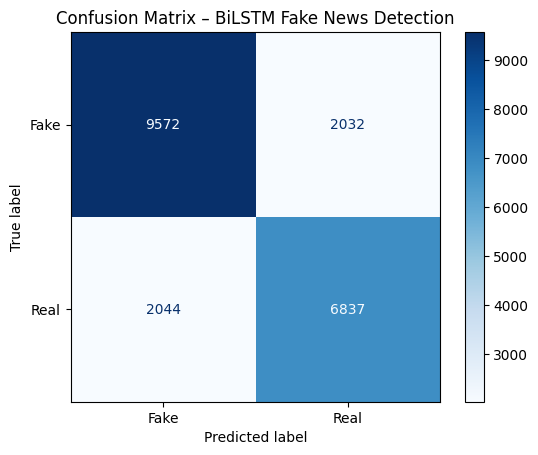

In [88]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Fake", "Real"]
)

plt.figure()
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – BiLSTM Fake News Detection")
plt.show()


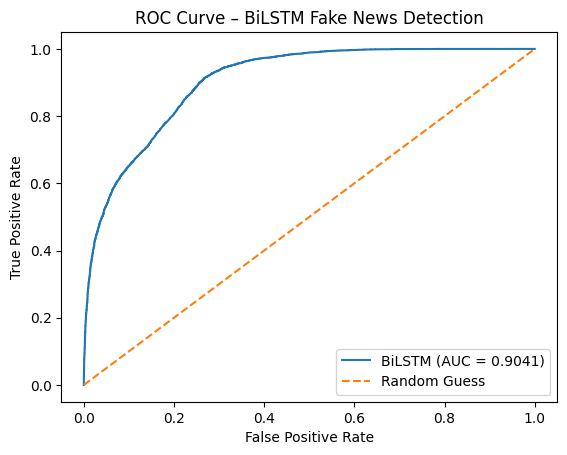

ROC AUC: 0.9040751433184439


In [89]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'BiLSTM (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – BiLSTM Fake News Detection")
plt.legend()
plt.show()

print("ROC AUC:", auc_score)
